<a href="https://colab.research.google.com/github/RylieWeaver/NLP/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab 2

Link: https://colab.research.google.com/drive/1ZfNT8qKdhXWWn1iK-3PHcnq0OYg1Ujuj?usp=sharing

# Part 1

## Setup

### Read File

In [ ]:
# Mount drive for directory structure
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Travel to Lab2 Directory
%cd "/content/drive/MyDrive/NLP/Lab2"

/content/drive/MyDrive/NLP/Lab2


In [ ]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv  Restaurant_reviews_R.gsheet


In [ ]:
import pandas as pd
column_names = ['Rating', 'Date', 'Review', 'Business', 'City', 'State', 'Zip', 'Business Rating Score']
reviews = pd.read_csv('Restaurant_reviews_R.csv', header=None, names=column_names)

In [ ]:
reviews.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5


## Familiarize with Data

In [ ]:
reviews.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5


In [ ]:
reviews.shape

(63230, 8)

**Graphs**

In [ ]:
from matplotlib import pyplot as plt

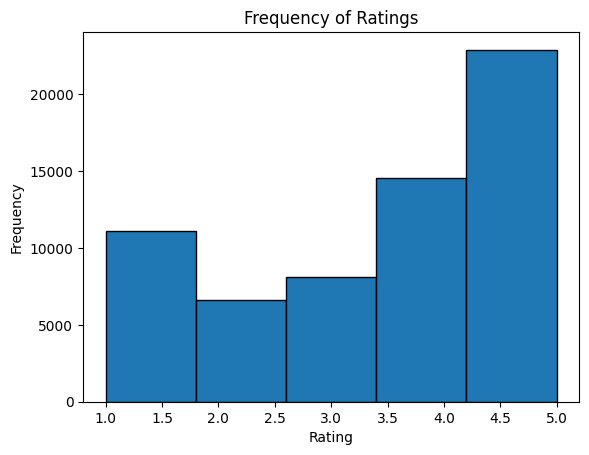

In [ ]:
# Rating histogram
reviews['Rating'].plot(kind='hist', bins=5, edgecolor='black')

# Add titles and labels
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

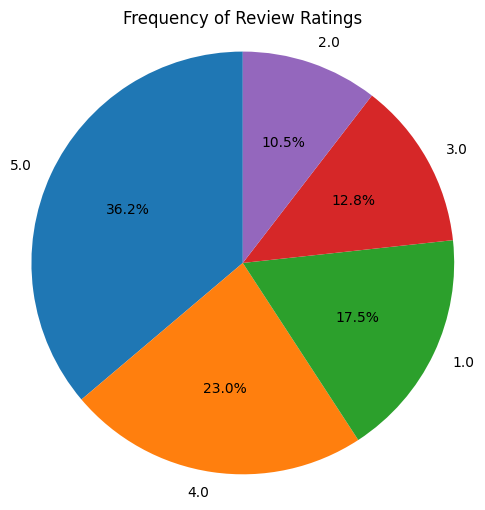

In [ ]:
# Pie chart
rating_counts = reviews['Rating'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Frequency of Review Ratings')

# Show the plot
plt.show()

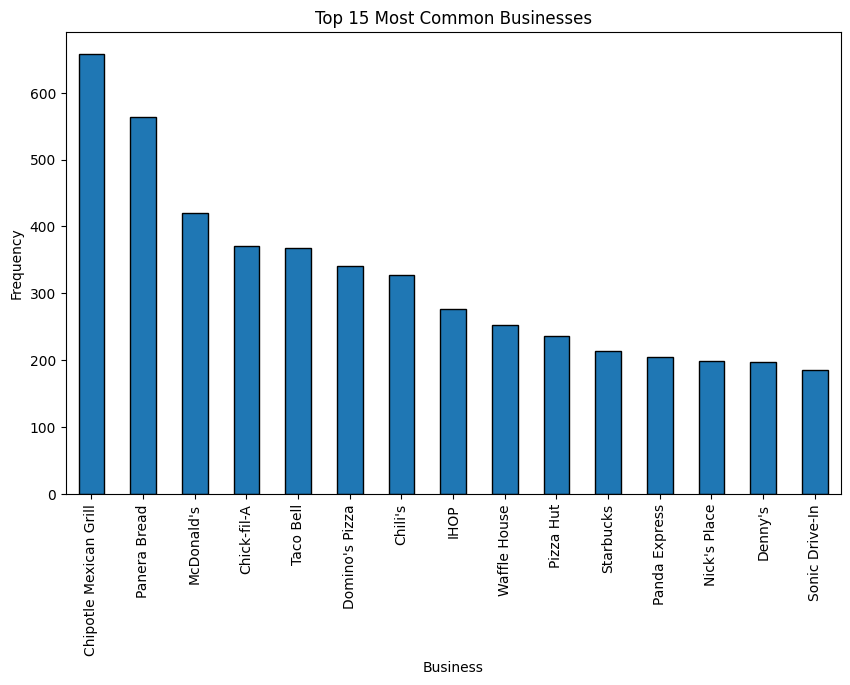

In [ ]:
# Get the counts of occurrences for each business
business_counts = reviews['Business'].value_counts()

# Select the top 15 most common businesses
top_businesses = business_counts.head(15)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_businesses.plot(kind='bar', edgecolor='black')

# Add titles and labels
plt.title('Top 15 Most Common Businesses')
plt.xlabel('Business')
plt.ylabel('Frequency')

# Show the plot
plt.show()

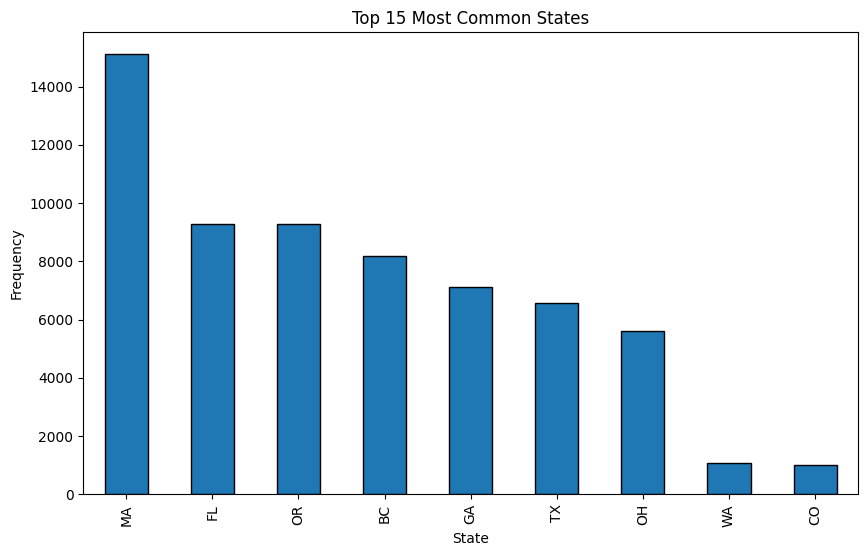

In [ ]:
# State histogram
state_counts = reviews['State'].value_counts()

# Select the top 15 most common states
top_states = state_counts.head(15)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', edgecolor='black')

# Add titles and labels
plt.title('Top 15 Most Common States')
plt.xlabel('State')
plt.ylabel('Frequency')

# Show the plot
plt.show()

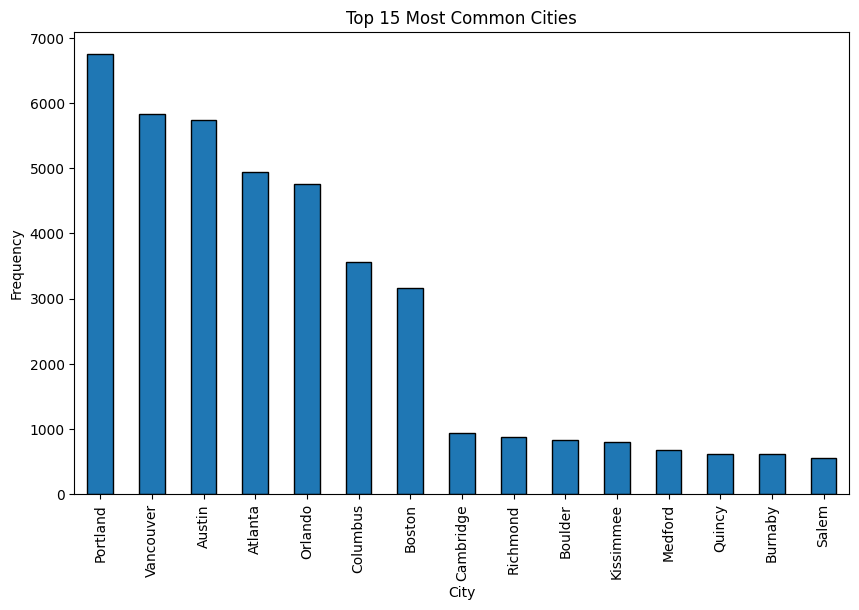

In [ ]:
# Get the counts of occurrences for each city
city_counts = reviews['City'].value_counts()

# Select the top 15 most common cities
top_cities = city_counts.head(15)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', edgecolor='black')

# Add titles and labels
plt.title('Top 15 Most Common Cities')
plt.xlabel('City')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Preprocessing

### Setup

In [ ]:
!pip install nltk

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Initialize clean dataframe with column to be cleaned (must do deepcopy)

"""Note that I call the new dataframe and column clean, but they are really
Initializations to be cleaned"""

reviews_clean = reviews.copy()
reviews_clean['Cleaned Review'] = reviews_clean['Review']

In [ ]:
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,its the best pizza hut i'v found in florida al...
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"This place is an interesting combo. The chef, ..."
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,Pizza Hut is great! You get huge pizzas for yo...
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,Always a great place to taste some tea with fr...
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,Delish! Stopped in on a random Sunday and so g...


### Contraction Expansion

In [ ]:
import contractions

In [ ]:
# Define the contraction expansion function
def expand_contractions(text):
  expanded_text = contractions.fix(text)
  return expanded_text

In [ ]:
# Test the contraction expansion
column = reviews_clean['Cleaned Review']
test = column[10]
print(test)
print("----------------------------------------------------------------------")
print(expand_contractions(test))

Shame on me for taking so long to get here! I walk & notice signs saying, "Sue says..." I'm already liking this place. A woman takes my order & I ask if she is the famous Sue. She says, "I'm Sue, but not I'm not famous." 

I get a hot Italian. It was perfect. I like the bun a little toasted so it doesn't get soggy with the oil. I'll be back!
----------------------------------------------------------------------
Shame on me for taking so long to get here! I walk & notice signs saying, "Sue says..." I am already liking this place. A woman takes my order & I ask if she is the famous Sue. She says, "I am Sue, but not I am not famous." 

I get a hot Italian. It was perfect. I like the bun a little toasted so it does not get soggy with the oil. I will be back!


In [ ]:
# Apply contraction expansion to the DataFrame
reviews_clean['Cleaned Review'] = reviews_clean['Cleaned Review'].apply(expand_contractions)

In [ ]:
# Check expansion
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,its the best pizza hut i'v found in florida al...
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"This place is an interesting combo. The chef, ..."
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,Pizza Hut is great! You get huge pizzas for yo...
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,Always a great place to taste some tea with fr...
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,Delish! Stopped in on a random Sunday and so g...


### Tokenize

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def tokenize(text):
  tokenized = word_tokenize(text)
  return tokenized

In [ ]:
# Test the tokenization
column = reviews_clean['Cleaned Review']
test = column[10]
print(test)
print("----------------------------------------------------------------------")
print(tokenize(test))

Shame on me for taking so long to get here! I walk & notice signs saying, "Sue says..." I am already liking this place. A woman takes my order & I ask if she is the famous Sue. She says, "I am Sue, but not I am not famous." 

I get a hot Italian. It was perfect. I like the bun a little toasted so it does not get soggy with the oil. I will be back!
----------------------------------------------------------------------
['Shame', 'on', 'me', 'for', 'taking', 'so', 'long', 'to', 'get', 'here', '!', 'I', 'walk', '&', 'notice', 'signs', 'saying', ',', '``', 'Sue', 'says', '...', "''", 'I', 'am', 'already', 'liking', 'this', 'place', '.', 'A', 'woman', 'takes', 'my', 'order', '&', 'I', 'ask', 'if', 'she', 'is', 'the', 'famous', 'Sue', '.', 'She', 'says', ',', '``', 'I', 'am', 'Sue', ',', 'but', 'not', 'I', 'am', 'not', 'famous', '.', "''", 'I', 'get', 'a', 'hot', 'Italian', '.', 'It', 'was', 'perfect', '.', 'I', 'like', 'the', 'bun', 'a', 'little', 'toasted', 'so', 'it', 'does', 'not', 'get',

In [ ]:
# Apply tokenization to the DataFrame
reviews_clean['Cleaned Review'] = reviews_clean['Cleaned Review'].apply(tokenize)

In [ ]:
# Check tokenization
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,"[its, the, best, pizza, hut, i, ', v, found, i..."
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"[This, place, is, an, interesting, combo, ., T..."
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,"[Pizza, Hut, is, great, !, You, get, huge, piz..."
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,"[Always, a, great, place, to, taste, some, tea..."
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,"[Delish, !, Stopped, in, on, a, random, Sunday..."


### Normalization

In [ ]:
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load stopwords once (function was taking a long time?)
STOPWORDS = set(stopwords.words('english'))

def normalize_tokens(tokens):
  normalized_tokens = []

  for token in tokens:
      if isinstance(token, str):
        # Lowercasing
        token = token.lower()

        # Remove digits and punctuation
        token = re.sub(r'[\d\W]+', '', token)

        # If the token is not a stopword and its length is greater than 1, keep it
        if token and token not in STOPWORDS and len(token) > 1:
            normalized_tokens.append(token)

  return normalized_tokens

In [ ]:
# Test the normalization
column = reviews_clean['Cleaned Review']
test = column[10]
print(test)
print("----------------------------------------------------------------------")
print(normalize_tokens(test))

['Shame', 'on', 'me', 'for', 'taking', 'so', 'long', 'to', 'get', 'here', '!', 'I', 'walk', '&', 'notice', 'signs', 'saying', ',', '``', 'Sue', 'says', '...', "''", 'I', 'am', 'already', 'liking', 'this', 'place', '.', 'A', 'woman', 'takes', 'my', 'order', '&', 'I', 'ask', 'if', 'she', 'is', 'the', 'famous', 'Sue', '.', 'She', 'says', ',', '``', 'I', 'am', 'Sue', ',', 'but', 'not', 'I', 'am', 'not', 'famous', '.', "''", 'I', 'get', 'a', 'hot', 'Italian', '.', 'It', 'was', 'perfect', '.', 'I', 'like', 'the', 'bun', 'a', 'little', 'toasted', 'so', 'it', 'does', 'not', 'get', 'soggy', 'with', 'the', 'oil', '.', 'I', 'will', 'be', 'back', '!']
----------------------------------------------------------------------
['shame', 'taking', 'long', 'get', 'walk', 'notice', 'signs', 'saying', 'sue', 'says', 'already', 'liking', 'place', 'woman', 'takes', 'order', 'ask', 'famous', 'sue', 'says', 'sue', 'famous', 'get', 'hot', 'italian', 'perfect', 'like', 'bun', 'little', 'toasted', 'get', 'soggy', 

In [ ]:
# Apply normalization to the DataFrame
reviews_clean['Cleaned Review'] = reviews_clean['Cleaned Review'].apply(normalize_tokens)

In [ ]:
# Check normalization
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,"[best, pizza, hut, found, florida, always, got..."
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"[place, interesting, combo, chef, david, incre..."
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,"[pizza, hut, great, get, huge, pizzas, money, ..."
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,"[always, great, place, taste, tea, friends, st..."
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,"[delish, stopped, random, sunday, glad, normal..."


### Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def stem_tokens(token_list):
    stemmer = SnowballStemmer(language='english')  # Specify the language
    # Stem each token in the list
    stemmed_tokens = [stemmer.stem(token) for token in token_list]
    return stemmed_tokens

In [ ]:
# Test the stemming
column = reviews_clean['Cleaned Review']
test = column[10]
print(test)
print("----------------------------------------------------------------------")
print(stem_tokens(test))

['shame', 'taking', 'long', 'get', 'walk', 'notice', 'signs', 'saying', 'sue', 'says', 'already', 'liking', 'place', 'woman', 'takes', 'order', 'ask', 'famous', 'sue', 'says', 'sue', 'famous', 'get', 'hot', 'italian', 'perfect', 'like', 'bun', 'little', 'toasted', 'get', 'soggy', 'oil', 'back']
----------------------------------------------------------------------
['shame', 'take', 'long', 'get', 'walk', 'notic', 'sign', 'say', 'sue', 'say', 'alreadi', 'like', 'place', 'woman', 'take', 'order', 'ask', 'famous', 'sue', 'say', 'sue', 'famous', 'get', 'hot', 'italian', 'perfect', 'like', 'bun', 'littl', 'toast', 'get', 'soggi', 'oil', 'back']


In [ ]:
# Apply stemming to the DataFrame
reviews_clean['Cleaned Review'] = reviews_clean['Cleaned Review'].apply(stem_tokens)

In [ ]:
# Check stemming
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,"[best, pizza, hut, found, florida, alway, got,..."
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"[place, interest, combo, chef, david, incred, ..."
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,"[pizza, hut, great, get, huge, pizza, money, s..."
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,"[alway, great, place, tast, tea, friend, staff..."
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,"[delish, stop, random, sunday, glad, normal, e..."


### Keep only frequent stems

In [ ]:
from nltk import FreqDist

In [ ]:
# Use FreqDist() to find frequencies
fdist_reviews = FreqDist([stem for stems in reviews_clean['Cleaned Review'].values for stem in stems])

# Print information
print('The total number of tokens:',fdist_reviews.N())
print('The number of unique tokens:', len(fdist_reviews))

The total number of tokens: 3216191
The number of unique tokens: 45723


In [ ]:
# Sort stems based on the frequency count
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x:x[1], reverse= True)

In [ ]:
# View top stems and their frequency
for x in fdist_reviews_list[:12]:
 print (x[0], x[1])

food 46321
place 37347
good 36080
order 35586
like 25264
time 25173
great 24232
go 22942
get 22457
would 22154
servic 21250
one 20695


In [ ]:
# Create a list of top frequent stems
top_stems = [stem[0] for stem in fdist_reviews_list[:500]]

In [ ]:
# Check the top_stems
print(len(top_stems))
print(top_stems[:10])

500
['food', 'place', 'good', 'order', 'like', 'time', 'great', 'go', 'get', 'would']


In [ ]:
def top_stems_filter(stem_list, top_stems):
    """Filter a list of stems, keeping only those in the top stems list."""
    return [stem for stem in stem_list if stem in top_stems]

In [ ]:
# Test the function keeping top stems
column = reviews_clean['Cleaned Review']
test = column[10]
print(test)
print("----------------------------------------------------------------------")
print(top_stems_filter(test, top_stems))

['shame', 'take', 'long', 'get', 'walk', 'notic', 'sign', 'say', 'sue', 'say', 'alreadi', 'like', 'place', 'woman', 'take', 'order', 'ask', 'famous', 'sue', 'say', 'sue', 'famous', 'get', 'hot', 'italian', 'perfect', 'like', 'bun', 'littl', 'toast', 'get', 'soggi', 'oil', 'back']
----------------------------------------------------------------------
['take', 'long', 'get', 'walk', 'notic', 'say', 'say', 'alreadi', 'like', 'place', 'take', 'order', 'ask', 'say', 'get', 'hot', 'italian', 'perfect', 'like', 'bun', 'littl', 'toast', 'get', 'back']


In [ ]:
# Apply the top stems filtering function to each row
reviews_clean['Cleaned Review'] = reviews_clean['Cleaned Review'].apply(lambda x: top_stems_filter(x, top_stems))  # Need the lambda function to pass the top_stems argument

In [ ]:
# Check filtering
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,"[best, pizza, found, alway, got, great, deal, ..."
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"[place, chef, incred, cook, food, perfect, tas..."
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,"[pizza, great, get, huge, pizza, money, servic..."
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,"[alway, great, place, tast, tea, friend, staff..."
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,"[stop, sunday, glad, eat, found, make, good, c..."


### Make final string column



In [ ]:
"""Make cleaned string column"""

# Join tokens
reviews_clean['Cleaned_Review_Stems'] = reviews_clean['Cleaned Review'].apply(lambda tokens: ' '.join(tokens))

# Make sure the column is a string
reviews_clean['Cleaned_Review_Stems'] = reviews_clean['Cleaned_Review_Stems'].astype('string')

In [ ]:
# Check the string column
reviews_clean.head()

,Rating,Date,Review,Business,City,State,Zip,Business Rating Score,Cleaned Review,Cleaned_Review_Stems
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5,"[best, pizza, found, alway, got, great, deal, ...",best pizza found alway got great deal offer st...
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0,"[place, chef, incred, cook, food, perfect, tas...",place chef incred cook food perfect tast break...
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5,"[pizza, great, get, huge, pizza, money, servic...",pizza great get huge pizza money servic quick ...
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0,"[alway, great, place, tast, tea, friend, staff...",alway great place tast tea friend staff friend
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5,"[stop, sunday, glad, eat, found, make, good, c...",stop sunday glad eat found make good choic eat...


In [ ]:
# Check that column type is string
column_types = reviews_clean['Cleaned_Review_Stems'].dtypes
print(f"The data type of the final string column is: {column_types}")

The data type of the final string column is: string


### Store dataframe

In [ ]:
%pwd

'/content/drive/MyDrive/NLP/Lab2'

In [ ]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv  Restaurant_reviews_R.gsheet


In [ ]:
# Specify the filename
filename = 'cleaned_restaurant_review_stems.csv'

# Save the DataFrame as CSV
reviews_clean.to_csv(filename, index=False)

In [ ]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv  Restaurant_reviews_R.gsheet


# Part 2

**CHECKPOINT: Read New Raw File**

I will allow myself to redefine variables names now to avoid clutter

## Setup

### Read File

In [1]:
# Mount drive for directory structure
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Travel to Lab2 Directory
%cd "/content/drive/MyDrive/NLP/Lab2"

/content/drive/MyDrive/NLP/Lab2


In [4]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv  Restaurant_reviews_R.gsheet


In [9]:
import pandas as pd
column_names = ['Rating', 'Date', 'Review', 'Business', 'City', 'State', 'Zip', 'Business Rating Score']
reviews = pd.read_csv('Restaurant_reviews_R.csv', header=None, names=column_names)

In [10]:
print(reviews.shape)
reviews.head()

(63230, 8)


,Rating,Date,Review,Business,City,State,Zip,Business Rating Score
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5


## Group Dataframe

In [11]:
# Group dataframe
reviews_grouped = reviews.groupby(['Business', 'City', 'State', 'Zip']).agg({
    'Business Rating Score': 'mean',
    'Review': lambda reviews: ' '.join(reviews)
}).reset_index()

# Rename columns
reviews_grouped.columns = ['Restaurant', 'City', 'State', 'Zipcode', 'Business_rating_score', 'Reviews']

In [14]:
# Check grouped dataframe
print(f"Shape of grouped dataframe: {reviews_grouped.shape}")
reviews_grouped.head()

Shape of grouped dataframe: (1075, 6)


,Restaurant,City,State,Zipcode,Business_rating_score,Reviews
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...


## NER Tagging

### Setup

In [15]:
!pip install spacy

In [29]:
# Load spacy
import spacy
nlp = spacy.load("en_core_web_sm")

In [30]:
# Function to count NER entities in a text
def count_ner_entities(text):
    doc = nlp(text)
    counts = {'ORG': 0, 'PERSON': 0, 'DATE': 0}
    for ent in doc.ents:
        if ent.label_ in counts:
            counts[ent.label_] += 1
    return counts

### Testing

In [26]:
# Get reviews tring
review_column = reviews_grouped['Reviews']
string = review_column[0]
print(string[:100])

The ambience is kind of funky & interesting. Food and service were good if not excellent. Had a Grou


In [31]:
# Check applying ner tagging
print(count_ner_entities(string))

{'ORG': 30, 'PERSON': 37, 'DATE': 13}


### Tagging

In [33]:
# Apply the ner tagging
reviews_grouped['ner_counts'] = reviews_grouped['Reviews'].apply(count_ner_entities)

In [34]:
# Check tagging
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Reviews,ner_counts
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,"{'ORG': 30, 'PERSON': 37, 'DATE': 13}"
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,"{'ORG': 57, 'PERSON': 34, 'DATE': 36}"
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,"{'ORG': 16, 'PERSON': 5, 'DATE': 4}"
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","{'ORG': 27, 'PERSON': 27, 'DATE': 37}"
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,"{'ORG': 39, 'PERSON': 21, 'DATE': 8}"


## Store dataframe

In [35]:
%pwd

'/content/drive/MyDrive/NLP/Lab2'

In [36]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv  Restaurant_reviews_R.gsheet


In [37]:
# Specify the filename
filename = 'restaurant_review_NER.csv'

# Save the DataFrame as CSV
reviews_grouped.to_csv(filename, index=False)

In [38]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv
restaurant_review_NER.csv            Restaurant_reviews_R.gsheet


# Part 3

## Setup

**CHECKPOINT: Read New Raw File**

I will allow myself to redefine variables names now to avoid clutter

### Read File

In [1]:
# Mount drive for directory structure
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Travel to Lab2 Directory
%cd "/content/drive/MyDrive/NLP/Lab2"

/content/drive/MyDrive/NLP/Lab2


In [3]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv
restaurant_review_NER.csv            Restaurant_reviews_R.gsheet


In [4]:
import pandas as pd
column_names = ['Rating', 'Date', 'Review', 'Business', 'City', 'State', 'Zip', 'Business Rating Score']
reviews = pd.read_csv('Restaurant_reviews_R.csv', header=None, names=column_names)

In [5]:
print(reviews.shape)
reviews.head()

(63230, 8)


,Rating,Date,Review,Business,City,State,Zip,Business Rating Score
0,5.0,2008-09-29 09:33:04,its the best pizza hut i'v found in florida al...,Pizza Hut,Orlando,FL,32819,3.5
1,3.0,2013-12-06 23:22:26,"This place is an interesting combo. The chef, ...",La Mongerie Bakery & Bistro,Atlanta,GA,30308,3.0
2,5.0,2008-11-16 09:44:04,Pizza Hut is great! You get huge pizzas for yo...,Pizza Hut,Orlando,FL,32819,3.5
3,5.0,2016-04-11 17:00:34,Always a great place to taste some tea with fr...,Teavana,Atlanta,GA,30326,3.0
4,4.0,2015-05-26 06:47:56,Delish! Stopped in on a random Sunday and so g...,Native Foods Cafe,Happy Valley,OR,97086,4.5


## Group Dataframe

In [123]:
# Group dataframe
reviews_grouped = reviews.groupby(['Business', 'City', 'State', 'Zip']).agg({
    'Business Rating Score': 'mean',
    'Review': lambda reviews: ' '.join(reviews)
}).reset_index()

# Rename columns
reviews_grouped.columns = ['Restaurant', 'City', 'State', 'Zipcode', 'Business_rating_score', 'Review']

In [124]:
# Check grouped dataframe
print(f"Shape of grouped dataframe: {reviews_grouped.shape}")
reviews_grouped.head()

Shape of grouped dataframe: (1075, 6)


,Restaurant,City,State,Zipcode,Business_rating_score,Review
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...


## Preprocessing

### Setup

In [17]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.8 MB/s eta 0:00:00


In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
# Initialize new column to be cleaned
reviews_grouped['Cleaned Review'] = reviews_grouped['Review']

In [126]:
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned Review
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,The ambience is kind of funky & interesting. F...
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,I like 21 Nickels a ton and they'd attract mor...
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,This place needs to be shut down. I couldn't b...
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","Well, it's re-opened.\n\nStopped in today just..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,First visit here for my weekly southern BBQ fi...


### Contraction Expansion

In [85]:
import contractions

In [86]:
# Define the contraction expansion function
def expand_contractions(text):
  expanded_text = contractions.fix(text)
  return expanded_text

In [87]:
# Test the contraction expansion
column = reviews_grouped['Cleaned Review']
test = column[10]
print(test[:200])
print("----------------------------------------------------------------------")
print(expand_contractions(test[:200]))

I love the cheesesteaks here!  Lots of flavor, generous with their toppings and hot crispy fries. My favorite place close to home to visit for lunch! I always take mine to go and it's always perfect a
----------------------------------------------------------------------
I love the cheesesteaks here!  Lots of flavor, generous with their toppings and hot crispy fries. My favorite place close to home to visit for lunch! I always take mine to go and it is always perfect a


In [127]:
# Apply contraction expansion to the DataFrame
reviews_grouped['Cleaned Review'] = reviews_grouped['Cleaned Review'].apply(expand_contractions)

In [128]:
# Check expansion
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned Review
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,The ambience is kind of funky & interesting. F...
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,I like 21 Nickels a ton and they would attract...
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,This place needs to be shut down. I could not ...
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","Well, it is re-opened.\n\nStopped in today jus..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,First visit here for my weekly southern BBQ fi...


### Tokenize / POS Tag (and lowercase)

Combining these things as done in the lab example

In [90]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [91]:
# Function to convert string to lowercased, tokenized, with POS tags
def token_and_POS(text):
  tokens = word_tokenize(text.lower())  # Tokenize and lowercase
  tagged = pos_tag(tokens)  # POS tagging
  return tagged

In [92]:
# Test the tokenization / POS tagging
column = reviews_grouped['Cleaned Review']
test = column[10]
print(test[:200])
print("----------------------------------------------------------------------")
print(token_and_POS(test[:125]))

I love the cheesesteaks here!  Lots of flavor, generous with their toppings and hot crispy fries. My favorite place close to home to visit for lunch! I always take mine to go and it is always perfect 
----------------------------------------------------------------------
[('i', 'NN'), ('love', 'VBP'), ('the', 'DT'), ('cheesesteaks', 'NNS'), ('here', 'RB'), ('!', '.'), ('lots', 'NNS'), ('of', 'IN'), ('flavor', 'NN'), (',', ','), ('generous', 'JJ'), ('with', 'IN'), ('their', 'PRP$'), ('toppings', 'NNS'), ('and', 'CC'), ('hot', 'JJ'), ('crispy', 'NN'), ('fries', 'NNS'), ('.', '.'), ('my', 'PRP$'), ('favorite', 'JJ'), ('place', 'NN'), ('close', 'RB'), ('to', 'TO')]


In [129]:
# Assuming 'df' is your DataFrame and 'review_column' is the column with text to be tagged
reviews_grouped['POS_Tags'] = reviews_grouped['Cleaned Review'].apply(token_and_POS)

In [130]:
# Check lowercasing, tokenization, and POS tagging
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned Review,POS_Tags
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,The ambience is kind of funky & interesting. F...,"[(the, DT), (ambience, NN), (is, VBZ), (kind, ..."
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,I like 21 Nickels a ton and they would attract...,"[(i, NNS), (like, VBP), (21, CD), (nickels, NN..."
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,This place needs to be shut down. I could not ...,"[(this, DT), (place, NN), (needs, VBZ), (to, T..."
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","Well, it is re-opened.\n\nStopped in today jus...","[(well, RB), (,, ,), (it, PRP), (is, VBZ), (re..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,First visit here for my weekly southern BBQ fi...,"[(first, RB), (visit, NN), (here, RB), (for, I..."


### Normalization

In [95]:
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
# Load stopwords once (function was taking a long time?)
STOPWORDS = set(stopwords.words('english'))

# Adjust function for token, POS tag tuples
def normalize_tokens(token_tuples):
    normalized_tokens = []

    for word, pos_tag in token_tuples:  # Unpack the tuple
        # Lowercasing already done but kept as a comment
        # word = word.lower()

        # Remove digits and punctuation
        word = re.sub(r'[\d\W]+', '', word)

        # If the token is not a stopword, and its length is greater than 1, keep it
        if word and word not in STOPWORDS and len(word) > 1:
            normalized_tokens.append((word, pos_tag))  # Keep the word and its POS tag

    return normalized_tokens

In [97]:
# Test the normalization
column = reviews_grouped['POS_Tags']
test = column[0]
print(test[:200])
print("----------------------------------------------------------------------")
print(normalize_tokens(test[:200]))

[('the', 'DT'), ('ambience', 'NN'), ('is', 'VBZ'), ('kind', 'NN'), ('of', 'IN'), ('funky', 'NN'), ('&', 'CC'), ('interesting', 'NN'), ('.', '.'), ('food', 'NN'), ('and', 'CC'), ('service', 'NN'), ('were', 'VBD'), ('good', 'JJ'), ('if', 'IN'), ('not', 'RB'), ('excellent', 'JJ'), ('.', '.'), ('had', 'VBD'), ('a', 'DT'), ('groupon', 'NN'), ('deal', 'NN'), ('so', 'RB'), ('tried', 'VBD'), ('a', 'DT'), ('wide', 'JJ'), ('variety', 'NN'), ('.', '.'), ('special', 'JJ'), ('rolls', 'NNS'), ('are', 'VBP'), ('good', 'JJ'), ('.', '.'), ('tempura', 'NN'), ('just', 'RB'), ('okay', 'RB'), ('.', '.'), ('beer', 'NN'), ('prices', 'NNS'), ('quite', 'RB'), ('good', 'JJ'), ('.', '.'), ('nice', 'JJ'), ('casual', 'JJ'), ('place', 'NN'), ('for', 'IN'), ('family', 'NN'), ('and', 'CC'), ('friends', 'NNS'), ('.', '.'), ('fine', 'NN'), ('for', 'IN'), ('kids', 'NNS'), ('.', '.'), ('not', 'RB'), ('too', 'RB'), ('busy', 'JJ'), ('.', '.'), ('we', 'PRP'), ('called', 'VBD'), ('for', 'IN'), ('take', 'NN'), ('out', 'RP'), 

In [131]:
# Apply normalization to the DataFrame
reviews_grouped['POS_Tags'] = reviews_grouped['POS_Tags'].apply(normalize_tokens)

In [132]:
# Check normalization
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned Review,POS_Tags
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,The ambience is kind of funky & interesting. F...,"[(ambience, NN), (kind, NN), (funky, NN), (int..."
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,I like 21 Nickels a ton and they would attract...,"[(like, VBP), (nickels, NNS), (ton, NN), (woul..."
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,This place needs to be shut down. I could not ...,"[(place, NN), (needs, VBZ), (shut, VBN), (coul..."
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","Well, it is re-opened.\n\nStopped in today jus...","[(well, RB), (reopened, JJ), (stopped, VBN), (..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,First visit here for my weekly southern BBQ fi...,"[(first, RB), (visit, NN), (weekly, JJ), (sout..."


### Lemmatization

In [100]:
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [101]:
def lemmatize(tagged_tokens):
  # Initialize objects
  wnl = WordNetLemmatizer()
  lemmatized_tokens = []

  # Lemmatize based on POS
  for word, tag in tagged_tokens:
    if tag.startswith('NN'):
      token = wnl.lemmatize(word, pos='n') # n is Noun
    elif tag.startswith('VB'):
      token = wnl.lemmatize(word, pos='v') # v is Verb
    elif tag.startswith('JJ'):
      token = wnl.lemmatize(word, pos='a') # a is Adjective
    elif tag.startswith('RB'):
      token = wnl.lemmatize(word, pos='r') # r is Adverb
    else:
      token = word

    # Append the lemma
    lemmatized_tokens.append(token)

  return lemmatized_tokens

In [102]:
# Test the lemmatization
column = reviews_grouped['POS_Tags']
test = column[10]
print(test[:200])
print("----------------------------------------------------------------------")
print(lemmatize(test[:200]))

[('love', 'VBP'), ('cheesesteaks', 'NNS'), ('lots', 'NNS'), ('flavor', 'NN'), ('generous', 'JJ'), ('toppings', 'NNS'), ('hot', 'JJ'), ('crispy', 'NN'), ('fries', 'NNS'), ('favorite', 'JJ'), ('place', 'NN'), ('close', 'JJ'), ('home', 'NN'), ('visit', 'VB'), ('lunch', 'NN'), ('always', 'RB'), ('take', 'VBP'), ('mine', 'NN'), ('go', 'VB'), ('always', 'RB'), ('perfect', 'JJ'), ('hot', 'JJ'), ('wow', 'NN'), ('place', 'NN'), ('really', 'RB'), ('good', 'JJ'), ('cheesesteak', 'NN'), ('combo', 'NN'), ('cheesesteak', 'NN'), ('great', 'JJ'), ('fries', 'NNS'), ('world', 'NN'), ('service', 'NN'), ('first', 'JJ'), ('rate', 'NN'), ('bit', 'NN'), ('dicey', 'NN'), ('get', 'VB'), ('parking', 'NN'), ('lot', 'NN'), ('strip', 'NN'), ('mall', 'NN'), ('let', 'VB'), ('stop', 'VB'), ('trying', 'VBG'), ('place', 'NN'), ('really', 'RB'), ('impressed', 'JJ'), ('steak', 'NN'), ('provolone', 'NN'), ('sandwich', 'NN'), ('price', 'NN'), ('think', 'VB'), ('find', 'VB'), ('better', 'JJR'), ('asked', 'VBD'), ('wanted', 

In [133]:
# Apply lemmatization to the DataFrame
reviews_grouped['Lemmatized Review'] = reviews_grouped['POS_Tags'].apply(lemmatize)  # Adjust tokenization as needed

In [134]:
# Check lemmatization
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned Review,POS_Tags,Lemmatized Review
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,The ambience is kind of funky & interesting. F...,"[(ambience, NN), (kind, NN), (funky, NN), (int...","[ambience, kind, funky, interesting, food, ser..."
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,I like 21 Nickels a ton and they would attract...,"[(like, VBP), (nickels, NNS), (ton, NN), (woul...","[like, nickel, ton, would, attract, business, ..."
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,This place needs to be shut down. I could not ...,"[(place, NN), (needs, VBZ), (shut, VBN), (coul...","[place, need, shut, could, believe, rude, pers..."
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","Well, it is re-opened.\n\nStopped in today jus...","[(well, RB), (reopened, JJ), (stopped, VBN), (...","[well, reopened, stop, today, see, change, mak..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,First visit here for my weekly southern BBQ fi...,"[(first, RB), (visit, NN), (weekly, JJ), (sout...","[first, visit, weekly, southern, bbq, fix, pla..."


### Lemma Frequency

In [135]:
from nltk import FreqDist

In [136]:
# Use FreqDist() to find frequencies
fdist_reviews = FreqDist([lemmas for lemmas in reviews_grouped['Lemmatized Review'].values for lemmas in lemmas])

# Print information
print('The total number of lemmas:',fdist_reviews.N())
print('The number of unique lemmas:', len(fdist_reviews))

The total number of lemmas: 3216191
The number of unique lemmas: 54346


In [137]:
# Sort lemmas based on the frequency count
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x:x[1], reverse=True)

In [138]:
# View top lemmas and their frequency
for x in fdist_reviews_list[:12]:
 print (x[0], x[1])

food 46317
good 40284
place 37343
get 35995
order 35111
go 32771
time 24840
like 24643
great 24346
come 22645
would 22154
service 21226


In [139]:
# Create a list of top 20 frequent lemmas
top_20_lemmas = [lemma[0] for lemma in fdist_reviews_list[:20]]

In [140]:
# Create a list of top 200 frequent lemmas
top_200_lemmas = [lemma[0] for lemma in fdist_reviews_list[:200]]

In [142]:
# Check the top lemmas
print(len(top_20_lemmas))
print(len(top_200_lemmas))
print(top_20_lemmas[:20])
print(top_200_lemmas[:25])

20
200
['food', 'good', 'place', 'get', 'order', 'go', 'time', 'like', 'great', 'come', 'would', 'service', 'one', 'make', 'back', 'try', 'really', 'chicken', 'restaurant', 'say']
['food', 'good', 'place', 'get', 'order', 'go', 'time', 'like', 'great', 'come', 'would', 'service', 'one', 'make', 'back', 'try', 'really', 'chicken', 'restaurant', 'say', 'take', 'also', 'well', 'eat', 'pizza']


In [143]:
def top_lemmas_filter(lemma_list, top_lemmas):
    """Filter a list of stems, keeping only those in the top stems list."""
    return [lemma for lemma in lemma_list if lemma in top_lemmas]

In [144]:
# Test the function keeping top lemmas
column = reviews_grouped['Lemmatized Review']
test = column[10]
print(test[:25])
print("----------------------------------------------------------------------")
print(top_lemmas_filter(test[:25], top_20_lemmas))
print("----------------------------------------------------------------------")
print(top_lemmas_filter(test[:25], top_200_lemmas))

['love', 'cheesesteaks', 'lot', 'flavor', 'generous', 'topping', 'hot', 'crispy', 'fry', 'favorite', 'place', 'close', 'home', 'visit', 'lunch', 'always', 'take', 'mine', 'go', 'always', 'perfect', 'hot', 'wow', 'place', 'really']
----------------------------------------------------------------------
['place', 'go', 'place', 'really']
----------------------------------------------------------------------
['love', 'lot', 'flavor', 'hot', 'fry', 'favorite', 'place', 'close', 'home', 'visit', 'lunch', 'always', 'take', 'go', 'always', 'perfect', 'hot', 'place', 'really']


In [145]:
# Apply the top lemmas filtering function to each row
reviews_grouped['Lemmatized Review (20)'] = reviews_grouped['Lemmatized Review'].apply(lambda x: top_lemmas_filter(x, top_20_lemmas))  # Need the lambda function to pass the top_stems argument
reviews_grouped['Lemmatized Review (200)'] = reviews_grouped['Lemmatized Review'].apply(lambda x: top_lemmas_filter(x, top_200_lemmas))  # Need the lambda function to pass the top_stems argument

In [146]:
# Check filtering
reviews_grouped.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned Review,POS_Tags,Lemmatized Review,Lemmatized Review (20),Lemmatized Review (200)
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,The ambience is kind of funky & interesting. F...,"[(ambience, NN), (kind, NN), (funky, NN), (int...","[ambience, kind, funky, interesting, food, ser...","[food, service, good, try, good, good, place, ...","[kind, food, service, good, excellent, try, sp..."
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,I like 21 Nickels a ton and they would attract...,"[(like, VBP), (nickels, NNS), (ton, NN), (woul...","[like, nickel, ton, would, attract, business, ...","[like, would, good, service, good, place, grea...","[like, would, close, next, good, burger, servi..."
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,This place needs to be shut down. I could not ...,"[(place, NN), (needs, VBZ), (shut, VBN), (coul...","[place, need, shut, could, believe, rude, pers...","[place, order, come, order, would, try, would,...","[place, need, could, order, come, hour, order,..."
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","Well, it is re-opened.\n\nStopped in today jus...","[(well, RB), (reopened, JJ), (stopped, VBN), (...","[well, reopened, stop, today, see, change, mak...","[make, service, service, go, say, one, food, g...","[well, stop, see, make, new, look, new, table,..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,First visit here for my weekly southern BBQ fi...,"[(first, RB), (visit, NN), (weekly, JJ), (sout...","[first, visit, weekly, southern, bbq, fix, pla...","[place, good, like, great, restaurant, time, s...","[first, visit, place, ok, much, good, taste, l..."


## Finalize Dataframes



### Cleaned Review

In [148]:
# Make new dataframe
reviews_processed = reviews_grouped[['Restaurant', 'City', 'State', 'Zipcode', 'Business_rating_score', 'Review', 'Lemmatized Review (20)']].copy()

In [149]:
"""Make clean string column"""

# Join processed tokens
reviews_processed['Cleaned_review_lemma'] = reviews_processed['Lemmatized Review (20)'].apply(lambda tokens: ' '.join(tokens))

# Make sure the column is a string
reviews_processed['Cleaned_review_lemma'] = reviews_processed['Cleaned_review_lemma'].astype('string')

In [150]:
# Check the string column
reviews_processed.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Lemmatized Review (20),Cleaned_review_lemma
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,"[food, service, good, try, good, good, place, ...",food service good try good good place say woul...
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,"[like, would, good, service, good, place, grea...",like would good service good place great great...
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,"[place, order, come, order, would, try, would,...",place order come order would try would would o...
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...","[make, service, service, go, say, one, food, g...",make service service go say one food get try s...
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,"[place, good, like, great, restaurant, time, s...",place good like great restaurant time service ...


In [151]:
# Check that column type is string
column_types = reviews_processed['Cleaned_review_lemma'].dtypes
print(f"The data type of the final string column is: {column_types}")

The data type of the final string column is: string


In [153]:
# Drop unnecessary column
reviews_processed.drop(['Lemmatized Review (20)'], axis=1, inplace=True)

In [154]:
# Check dropping
reviews_processed.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Review,Cleaned_review_lemma
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,The ambience is kind of funky & interesting. F...,food service good try good good place say woul...
1,21 Nickels,Watertown,MA,02472,4.0,I like 21 Nickels a ton and they'd attract mor...,like would good service good place great great...
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,This place needs to be shut down. I couldn't b...,place order come order would try would would o...
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"Well, it's re-opened.\n\nStopped in today just...",make service service go say one food get try s...
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,First visit here for my weekly southern BBQ fi...,place good like great restaurant time service ...


### BOW Vectorization

In [155]:
# Make new dataframe
reviews_BOW = reviews_grouped[['Restaurant', 'City', 'State', 'Zipcode', 'Business_rating_score', 'Lemmatized Review (200)']].copy()

In [157]:
# Check copy
reviews_BOW.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Lemmatized Review (200)
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,"[kind, food, service, good, excellent, try, sp..."
1,21 Nickels,Watertown,MA,02472,4.0,"[like, would, close, next, good, burger, servi..."
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,"[place, need, could, order, come, hour, order,..."
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"[well, stop, see, make, new, look, new, table,..."
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,"[first, visit, place, ok, much, good, taste, l..."


In [156]:
# using lemma frequency as features
def frequency_feature(row, col_name, word):
  if word in row[col_name]:
    return row[col_name].count(word)
  else:
    return 0

In [166]:
# Test the function making frequency feature
for word in top_200_lemmas[:5]:
  print(word, frequency_feature(reviews_BOW.iloc[0], 'Lemmatized Review (200)', word))

food 29
good 31
place 23
get 24
order 12


In [168]:
import time
start_time = time.time()
# Lemma as feature name with frequency as feature/row value
for word in top_200_lemmas:
  reviews_BOW[word] = reviews_BOW.apply(lambda row:frequency_feature(row, 'Lemmatized Review (200)', word), axis =1)
  duration = time.time() - start_time
print(f"The loop ran for {duration} seconds.")

The loop ran for 26.571488618850708 seconds.


In [169]:
# Check dataframe
reviews_BOW.head()

,Restaurant,City,State,Zipcode,Business_rating_score,Lemmatized Review (200),food,good,place,get,...,overall,actually,let,line,free,busy,old,steak,half,plate
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,"[kind, food, service, good, excellent, try, sp...",29,31,23,24,...,5,5,1,0,0,5,1,0,5,3
1,21 Nickels,Watertown,MA,02472,4.0,"[like, would, close, next, good, burger, servi...",60,64,48,51,...,5,5,5,2,6,4,1,11,2,1
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,"[place, need, could, order, come, hour, order,...",13,7,38,18,...,0,2,1,0,1,1,0,0,1,1
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,"[well, stop, see, make, new, look, new, table,...",34,39,24,19,...,1,1,2,0,2,0,3,0,1,1
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,"[first, visit, place, ok, much, good, taste, l...",15,28,38,25,...,1,3,3,0,0,0,1,0,3,2


In [172]:
# Drop unnecessary column
reviews_BOW.drop(['Lemmatized Review (200)'], axis=1, inplace=True)

In [173]:
# Check dropping
reviews_BOW.head()

,Restaurant,City,State,Zipcode,Business_rating_score,food,good,place,get,order,...,overall,actually,let,line,free,busy,old,steak,half,plate
0,1/2 Roll,Vancouver,BC,V5V 3P6,3.0,29,31,23,24,12,...,5,5,1,0,0,5,1,0,5,3
1,21 Nickels,Watertown,MA,02472,4.0,60,64,48,51,16,...,5,5,5,2,6,4,1,11,2,1
2,24 Hour Pizza Delivery,Boston,MA,02124,1.0,13,7,38,18,50,...,0,2,1,0,1,1,0,0,1,1
3,3 Monkeys Pub & Grill,Vancouver,WA,98665,3.0,34,39,24,19,8,...,1,1,2,0,2,0,3,0,1,1
4,5th St Ribs-N-Blues,Atlanta,GA,30308,3.0,15,28,38,25,18,...,1,3,3,0,0,0,1,0,3,2


### Store dataframes

In [174]:
%pwd

'/content/drive/MyDrive/NLP/Lab2'

In [175]:
%ls

cleaned_restaurant_review_stems.csv  Restaurant_reviews_R.csv
restaurant_review_NER.csv            Restaurant_reviews_R.gsheet


In [176]:
# Specify the filenames
processed_filename = 'cleaned_restaurant_review_lemmas.csv'
BOW_filename = 'restaurant_review_BOW.csv'

# Save the DataFrames as CSV
reviews_processed.to_csv(processed_filename, index=False)
reviews_BOW.to_csv(BOW_filename, index=False)

In [177]:
%ls

cleaned_restaurant_review_lemmas.csv  restaurant_review_BOW.csv  Restaurant_reviews_R.csv
cleaned_restaurant_review_stems.csv   restaurant_review_NER.csv  Restaurant_reviews_R.gsheet
